# Import

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [3]:
torch.manual_seed(1)

# Data

기본적으로 PyTorch Tensor는 NCHW형태이다.
* NCHW: 배치(batch-N), 채널(channals-C), 깊이(depth-D), 높이(height-H), 폭(width-W)

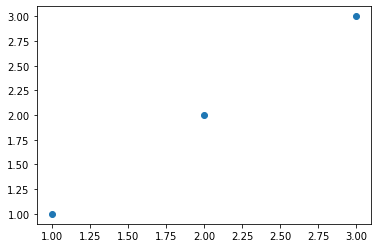

In [6]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])

plt.scatter(x_train,y_train)

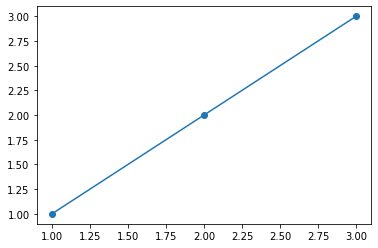

In [7]:
xs = np.linspace(1,3,100) #np.linespace(start,stop,num)
plt.scatter(x_train,y_train)
plt.plot(xs,xs)

# Cost

$H(x) = Wx$
점을 어떻게 이을지를 결정하는 함수가 원래 값(확인가능한 값)과 비교했을 때, 일치하는 정도를 cost로 알 수 있다.

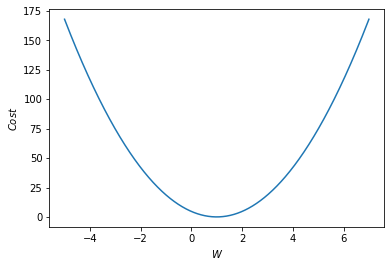

In [9]:
W_1 = np.linspace(-5,7,1000)
cost_1 = []
for W in W_1:
    hypothesis = W*x_train
    cost = torch.mean((hypothesis-y_train)**2)

    cost_1.append(cost.item())

plt.plot(W_1,cost_1)
plt.xlabel("$W$")
plt.ylabel("$Cost$")
plt.show()

# Gradient Descent

위 cost함수를 기울기를 통해 가장 낮은 지점을 찾아낼 수 있다.

In [10]:
W = 0
gradient = torch.sum((W*x_train-y_train)*x_train)
print(gradient)

tensor(-14.)


# Training

In [11]:
#Data

x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])

#Wieght intialize

W = torch.zeros(1)

#Set learning rate

lr = 0.1
nb_epochs = 10

for epoch in range(nb_epochs+1):

    #hypothesis
    pred = W*x_train

    #cost
    cost = torch.mean((W*x_train-y_train)**2)

    #gradient
    gradient = torch.sum((W*x_train-y_train)*x_train)

    print("W:",W,"W.item:",W.item())
    print("Gradient:",gradient)
    print("cost:",cost,"cost.item():",cost.item())
    print("Epoch {:3d}/{} W: {:.3f} cost{:.6f}".format(epoch,nb_epochs,W.item(),cost.item()))
    print()

    W -= lr*gradient #Reduce cost with gradient

W: tensor([0.]) W.item: 0.0
Gradient: tensor(-14.)
cost: tensor(4.6667) cost.item(): 4.666666507720947
Epoch   0/10 W: 0.000 cost4.666667

W: tensor([1.4000]) W.item: 1.399999976158142
Gradient: tensor(5.6000)
cost: tensor(0.7467) cost.item(): 0.7466664910316467
Epoch   1/10 W: 1.400 cost0.746666

W: tensor([0.8400]) W.item: 0.8400000333786011
Gradient: tensor(-2.2400)
cost: tensor(0.1195) cost.item(): 0.11946665495634079
Epoch   2/10 W: 0.840 cost0.119467

W: tensor([1.0640]) W.item: 1.0640000104904175
Gradient: tensor(0.8960)
cost: tensor(0.0191) cost.item(): 0.0191146582365036
Epoch   3/10 W: 1.064 cost0.019115

W: tensor([0.9744]) W.item: 0.9744000434875488
Gradient: tensor(-0.3584)
cost: tensor(0.0031) cost.item(): 0.00305833644233644
Epoch   4/10 W: 0.974 cost0.003058

W: tensor([1.0102]) W.item: 1.0102399587631226
Gradient: tensor(0.1434)
cost: tensor(0.0005) cost.item(): 0.0004893290461041033
Epoch   5/10 W: 1.010 cost0.000489

W: tensor([0.9959]) W.item: 0.9959040284156799
Gra

# Optim Ver

In [13]:
#Data

x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])

#Model initialize

W = torch.zeros(1,requires_grad=True)

#Set optimizer

opti = optim.SGD([W],lr=0.15)
nb_epochs=10

for epoch in range(nb_epochs+1):

    #model
    predic = W*x_train

    #cost
    cost=torch.mean((W*x_train-y_train)**2)

    print('Epoch {:4d}/{} W {:.3f} cost {:.3f}'.format(epoch,nb_epochs,W.item(),cost.item()))

    opti.zero_grad()
    cost.backward()
    opti.step


Epoch    0/10 W 0.000 cost 4.667
Epoch    1/10 W 0.000 cost 4.667
Epoch    2/10 W 0.000 cost 4.667
Epoch    3/10 W 0.000 cost 4.667
Epoch    4/10 W 0.000 cost 4.667
Epoch    5/10 W 0.000 cost 4.667
Epoch    6/10 W 0.000 cost 4.667
Epoch    7/10 W 0.000 cost 4.667
Epoch    8/10 W 0.000 cost 4.667
Epoch    9/10 W 0.000 cost 4.667
Epoch   10/10 W 0.000 cost 4.667
